In [3]:
import numpy as np
import matplotlib.pyplot as plt
from src.ASTD.utility_astd import trend_filter, update_array, non_symmetric_weights

## figure 5.4

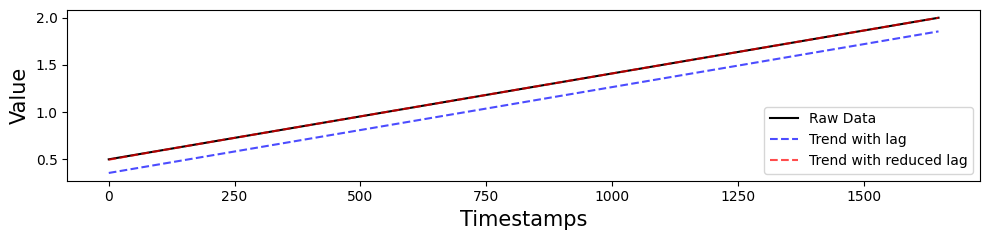

In [4]:
TS = np.linspace(0, 2, num=2200)
c = 500
kernel_c = non_symmetric_weights(c) 
buffer = np.zeros(c) 
t1_diff_buffer = np.zeros(c)

trend_withlag = []
final_trend = []
for idx, xi in enumerate(TS):
    buffer = update_array(buffer, xi)

    # de initiation trend
    t1 = trend_filter(weights=kernel_c, data=buffer)
    t_diff = xi - t1
    t1_diff_buffer = update_array(t1_diff_buffer, t_diff)
    t1_lagg = trend_filter(weights=kernel_c, data=t1_diff_buffer)

    trend_withlag.append(t1)
    final_trend.append(t1 + t1_lagg)
plt.figure(figsize=(10, 2.5))
plt.plot(TS[550:], color='black', label='Raw Data')
plt.plot(trend_withlag[550:], alpha=0.7, color='blue',linestyle='dashed', label='Trend with lag')
plt.plot(final_trend[550:], alpha=0.7, color='red',linestyle='dashed', label='Trend with reduced lag')
plt.legend(loc='lower right')
plt.xlabel('Timestamps', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.tight_layout()

## additional

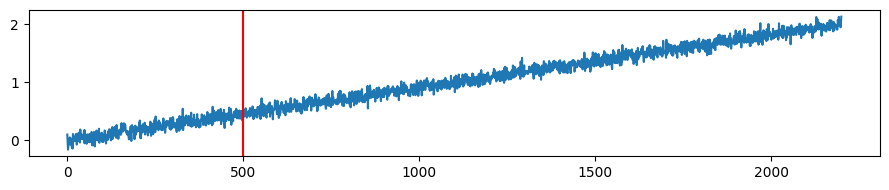

In [5]:
TS = np.linspace(0, 2, num=2200)
residual = 0.07 * np.random.randn(len(TS))
TS = TS+residual
plt.figure(figsize=(9, 2))
plt.plot(TS)
plt.axvline(499,color='red')
plt.tight_layout()

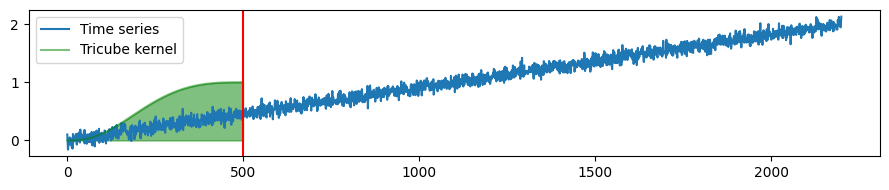

In [6]:
c = 500
kernel_c = non_symmetric_weights(c) 
plt.figure(figsize=(9, 2))
plt.plot(TS,label='Time series')
plt.plot(kernel_c,color='green', alpha=0.5, label='Tricube kernel')
plt.fill_between(range(0,500),kernel_c, color='green', alpha=0.5)
plt.axvline(499,color='red')
plt.legend()
plt.tight_layout()

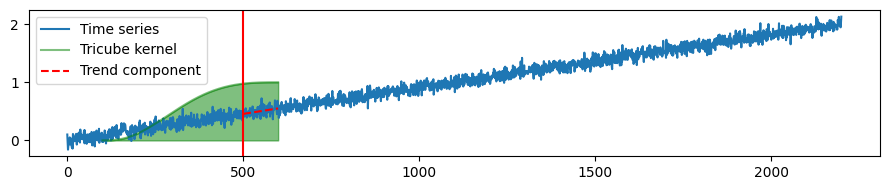

In [7]:
c = 500
kernel_c = non_symmetric_weights(c) 
buffer = np.zeros(c) 
t1_diff_buffer = np.zeros(c)

trend_withlag = []
final_trend = []
for idx, xi in enumerate(TS):
    buffer = update_array(buffer, xi)

    # de initiation trend
    t1 = trend_filter(weights=kernel_c, data=buffer)
    t_diff = xi - t1
    t1_diff_buffer = update_array(t1_diff_buffer, t_diff)
    t1_lagg = trend_filter(weights=kernel_c, data=t1_diff_buffer)

    trend_withlag.append(t1)
    final_trend.append(t1 + t1_lagg)

plt.figure(figsize=(9, 2))
plt.plot(TS,label='Time series')
plt.plot(range(100,600),kernel_c,color='green', alpha=0.5, label='Tricube kernel')
plt.fill_between(range(100,600),kernel_c, color='green', alpha=0.5)
plt.plot(range(500,600),final_trend[500:600], color='red',linestyle='dashed', label='Trend component')
plt.axvline(499,color='red')
plt.legend()
plt.tight_layout()
